# **STROJNO UČENJE** 22./23.
# Vježba 09 i 10 - ideje za projekt i kratki pregled različitih primjena strojnog učenja

Ova bilježnica je zamišljena kao bazen ideja za projekte, ali i kao priručnik za ulaz u neka konkretnija područja primjene koja su dolje nabrojana. Uglavnom se radi o metodama koje ne spadaju u "standardne algoritme" strojnog učenja. Ukoliko se ipak želite zadržati nad poznatim *sklearn* algoritmima, ima i ideja za to:
- usporedba [različitih algoritama za regresiju](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) nad istim skupom podataka
- usporedba [različitih algoritama za klasifikaciju](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) nad istim skupom podataka
- upotreba regularizacije u algoritmima (npr. [Ridge regression](https://www.statology.org/ridge-regression/), [LASSO regression](https://www.statology.org/lasso-regression/))
- usporedba algoritama za [grupiranje](https://scikit-learn.org/stable/modules/clustering.html)
- usporedba algoritama za [smanjenje dimenzionalnosti](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)
- analiza utjecaja izbora značajki na uspješnost modela, ovisno o odabranoj metrici (npr. točnost za klasifikaciju, RMSE za regresiju)
- analiza utjecaja hiperparametara na uspješnost modela i kako naći najbolje hiperparametre
- vizualni prikazi stabala odluke
- različite jezgrene funkcije u stroju potpornih vektora (SVM)
- primjena Naivnog Bayesa na odabrani problem obrade prirodnog jezika
- [perceptron](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network) kao regresijski model
- perceptron kao klasifikacijski model
- [unaprijedna neuronska mreža](https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/) za regresiju
- [unaprijedna neuronska mreža](https://victorzhou.com/blog/keras-neural-network-tutorial/) za klasifikaciju
- ...

Preporučuje se odabir modela koje je autor koda u stanju objasniti - ne u detalje s matematičkom pozadinom i jednadžbama, već svojim riječima znati objasniti zašto je nešto napisano kako jest i koju ideju to predstavlja.

Neki primjeri pitanja:
- što je regularizacija i koje različite postoje ($L_2, L_1$...) (za temu o regularizaciji)
- što je perceptron, što je aktivacijska funkcija, zašto je odabrana baš ta (za temu o perceptronu)
- što je feed-forward mehanizam, što je aktivacijska funkcija i čemu služi (za temu o unaprijednim neuronskim mrežama)
- što je konvolucija i čemu služi, što je filter i kako odaberemo njegovu veličinu (za konvolucijske neuronske mreže)
- ...

## FAQ

- **Kako izabrati ispravan model?**

[Cheatsheet.](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- **Kako *zapravo* radi neuronska mreža?**

[Vizualizacija za konvolucijsku neuronsku mrežu.](https://poloclub.github.io/cnn-explainer/#article-convolution)

[Vizualizacija u 3D.](https://adamharley.com/nn_vis/cnn/3d.html)

## Sustavi preporuke i matrični rastavi

**Sustavi preporuke** (eng. recommendation/[recommender systems](https://en.wikipedia.org/wiki/Recommender_system)) zauzimaju veliko mjesto u primjeni strojnog učenja i kompleksna su [tema](https://machinelearningmastery.com/recommender-systems-resources/) sami za sebe. Poanta sustava preporuke je da na temelju dosad viđenih i zabilježenih podataka predlaže što bolju instancu (film, pjesmu, postupak...) u novoj situaciji (npr. nekom korisniku sustava).

Ovakvi sustavi se koriste u mnogim slučajevima, možda najočitije u tzv. "streaming" platformama za filmove i glazbu, te u pretraživačima (eng. search engine). Postoji više tehnika za izgradnju sustava preporuke, među kojima su najpoznatiji:
- kolaborativno filtriranje (eng. [collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering))
- filtriranje temeljeno na sadržaju (eng. [content based filtering](https://www.turing.com/kb/content-based-filtering-in-recommender-systems))

Jedna od tehnika koja se često koristi su matrični rastavi (eng. [matrix factorization](https://en.wikipedia.org/wiki/Matrix_factorization_(recommender_systems))). Kod filtriranja se generira matrica $\left[ r_{ij} \right]$ u kojoj stupci označavaju instance (filmove, pjesme itd.), retci korisnike, a u kojoj se zapisuju dodijeljeni bodovi čime se reprezentira vjerojatnost da će se korisniku $i$ svidjeti preporuka instance $j$. Način na koji pomaže matrična faktorizacija je sljedeći: [izvor1](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b), [izvor2](https://medium.com/analytics-vidhya/matrix-factorization-made-easy-recommender-systems-7e4f50504477).
- Iz početne matrice se kreira produkt $R = UI$; gdje $R$ označava matricu preporuka, $U$ matricu korisnika (svaki redak odgovara korisniku, svaki stupac novoj "skrivenoj" značajki), $I$ matricu instanci (svaki stupac odgovara instanci, svaki redak novoj "skrivenoj" značajki).
- Budući da je matrično množenje ulančano, nove skrivene (latentne) značajke namjestimo po volji (uglavnom se dimenzija označi sa $k$). Dakle, rastavom sami kreiramo $k$ novih značajki koje pomažu pri izboru preporuke za svakog korisnika.

[Ovdje](https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/code?competitionId=7162&sortBy=voteCount) možete pronaći kaggle natjecanje vezano sa sustav preporuke pjesama, a [ovdje](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system) bilježnicu s implementiranim sustavom preporuke za filmove.

### Primjer

Koristimo [surprise](https://surprise.readthedocs.io/en/stable/index.html) biblioteku koja je specifično kreirana za sustave preporuke.

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise import Reader, Dataset, SVD

In [ ]:
reader = Reader()
data = Dataset.load_builtin("ml-100k")

print(f'Primjer jednog ratinga: (userId, movieId, rating, timestamp) = {data.raw_ratings[0]}')

Primjer jednog ratinga: (userId, movieId, rating, timestamp) = ('196', '242', 3.0, '881250949')


Algoritam matrične faktorizacije koji koristimo je rastav singularnih vrijednosti (eng. [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)).

In [ ]:
svd = SVD()

In [ ]:
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data, test_size=0.25)

svd.fit(trainset)
predictions = svd.test(testset)

accuracy.rmse(predictions)

RMSE: 0.9517


0.951653143680949

In [ ]:
predictions = svd.fit(trainset).test(testset)
predictions[0]

Prediction(uid='25', iid='79', r_ui=4.0, est=4.222145440112133, details={'was_impossible': False})

Pogledajmo u [dokumentaciji](https://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.predict) što znači ovaj izlaz metode *predict*.

## Konvolucijske neuronske mreže i rad sa slikama

Klasifikacija slika jedan je od čestih problema strojnog i dubokog učenja. Budući da se radi o problemu klasifikacije, može se riješiti "običnim" metodama klasičnog strojnog učenja, ali su popularnije tzv. konvolucijske neuronske mreže - posebni modeli dubokog strojnog učenja temeljeni na sekvencijalno posloženim slojevima u strukturu mreže koji su prilagođeni za rad sa slikama.

Slike su računalu reprezentirane kao matrice (ili [tenzori](https://en.wikipedia.org/wiki/Tensor), što shvaćamo kao poopćenje matrice s 2 na više dimenzija). Svi brojevi u matrici predstavljaju vrijednosti piksela. Zapis može ovisiti o formatu, korištenim bojama i sl.

> Tenzor kao matematički objekt nije "3D matrica"! Mi tenzore shvaćamo kao poopćenje matrice s 2D na 3D, 4D itd., ali tenzori nisu tako definirani! U kontekstu računarstva, tenzori se shvaćaju kao "kutije" u koje možemo smjestiti elemente ne samo po dvije osi, već po 3 ili više.

>> Od ovog termina dolazi i naziv biblioteke *tensorflow* za duboko strojno učenje.

<img src='https://drive.google.com/uc?id=1lKMp3owSTP2DRz2LO4BlIR_35qhxTlUN'>
<img src='https://drive.google.com/uc?id=1Idt8O7Pcu1QBvh4_5aa1H-A_irdcJySA'>

### Primjer

Radimo s ugrađenim skupom podataka [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape, x_test.shape

170498071/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

Imamo 50000 slika za treniranje, 10000 slika za testiranje. Slike su dimenzija 32 x 32. Svaka slika je u boji, što vidimo po broju RGB kanala boje (3). Svaki od brojeva u tenzoru predstavlja vrijednost piksela $\in [0, 255]$.

Tensorflow općenito radi s oblikom podataka `(n_samples, img_height, img_width, img_channels)`.



#### Algoritam klasičnog strojnog učenja - slučajna šuma

In [ ]:
# Normaliziramo vrijednosti piksela na raspon 0-1 tako da dijelimo s najvećom vrijednošću

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# sklearn očekuje 2D ulaz pa primjenjujemo reshape

nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples, nx*ny*nrgb)) # "ravnamo" tenzor u vektor
x_train2.shape # dobili 2D ulaz

(50000, 3072)

In [ ]:
# radimo isto i za testne podatke

nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples, nx*ny*nrgb))

In [ ]:
# učitavamo željeni klasifikator (bilo koji!)

from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(x_train2, y_train.ravel()) # transponiramo y_train iz vektora stupca u 1D niz

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [ ]:
accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test)) # detaljniji ispis standardnih klasifikacijskih metrika odjednom

              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1059
           1       0.55      0.52      0.54      1065
           2       0.34      0.38      0.36       893
           3       0.28      0.34      0.31       839
           4       0.38      0.37      0.38      1012
           5       0.39      0.43      0.41       919
           6       0.56      0.48      0.52      1171
           7       0.46      0.53      0.49       868
           8       0.61      0.59      0.60      1033
           9       0.55      0.48      0.51      1141

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [ ]:
confusion_matrix(y_pred, y_test)

array([[568,  38, 102,  57,  57,  34,  14,  48,  90,  51],
       [ 39, 553,  46,  40,  21,  30,  31,  51,  90, 164],
       [ 53,  20, 338,  79, 160,  83,  81,  47,  16,  16],
       [ 19,  38,  74, 282,  54, 164,  77,  54,  35,  42],
       [ 38,  19, 143,  78, 379,  81, 118, 116,  23,  17],
       [ 22,  30,  62, 184,  54, 391,  49,  80,  26,  21],
       [ 23,  34, 119, 140, 140,  81, 562,  35,  11,  26],
       [ 23,  28,  63,  50,  89,  72,  24, 457,  20,  42],
       [155,  59,  26,  22,  26,  28,   9,  22, 610,  76],
       [ 60, 181,  27,  68,  20,  36,  35,  90,  79, 545]])

#### Konvolucijska neuronska mreža

- [Uvod](https://towardsdatascience.com/understanding-convolutions-and-pooling-in-neural-networks-a-simple-explanation-885a2d78f211) u konvolucijske neuronske mreže.
- Za one koje zanima više o [konvoluciji](https://betterexplained.com/articles/intuitive-convolution/).


> [Interaktivni primjer mreže](https://poloclub.github.io/cnn-explainer/#article-convolution).

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/255.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model = Sequential() # sekvencijalni model mreze gdje dodajemo sloj po sloj

# kernel_size = dimenzije filtera
# input_shape = 32 x 32 piksela, 3 RGB kanala (slike u boji)
# strides = (1, 1) - preklapanje 1 redak, 1 stupac
model.add(Conv2D(32, kernel_size = (5,5), input_shape = (32,32,3), activation='relu'))

# pool_size = dimenzije pooling okvira kojim prolazimo preko ulaza
# strides = (2, 2) - nema preklapanja (korak je iste velicine kao i dimenzije okvira)
# ne moramo naglasavati broj neurona - nema parametara koji se uce
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size = (5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2)))


# izravnava matricu u vektor velicine 1024 = 4 x 4 x 64 (iz prethodnog sloja)
model.add(Flatten())

model.add(Dense(16, activation = 'relu'))

# klasificiramo na 10 klasa => 10 neurona
model.add(Dense(10, activation='softmax'))

# koristimo sparse_categorical_crossentropy funkciju gubitka koja NE trazi one-hot labele
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary() # ispis izgleda modela

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 16)                2

Za veće neuronske mreže dobro je uključiti GPU hardverski akcelerator zbog ubrzanja treniranja modela!

In [ ]:
povijest = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2) # validation_split za unakrsnu validaciju - uzimamo 20% podataka za validacijski skup

Epoch 1/15
625/625 [==============================] - 78s 124ms/step - loss: 1.7399 - accuracy: 0.3539 - val_loss: 1.4884 - val_accuracy: 0.4616
Epoch 2/15
625/625 [==============================] - 79s 126ms/step - loss: 1.3982 - accuracy: 0.4899 - val_loss: 1.3680 - val_accuracy: 0.5130
Epoch 3/15
625/625 [==============================] - 77s 123ms/step - loss: 1.2588 - accuracy: 0.5446 - val_loss: 1.2193 - val_accuracy: 0.5671
Epoch 4/15
625/625 [==============================] - 78s 124ms/step - loss: 1.1705 - accuracy: 0.5817 - val_loss: 1.1581 - val_accuracy: 0.5932
Epoch 5/15
625/625 [==============================] - 79s 127ms/step - loss: 1.1076 - accuracy: 0.6036 - val_loss: 1.1657 - val_accuracy: 0.5882
Epoch 6/15
625/625 [==============================] - 77s 123ms/step - loss: 1.0525 - accuracy: 0.6271 - val_loss: 1.0967 - val_accuracy: 0.6169
Epoch 7/15
625/625 [==============================] - 76s 122ms/step - loss: 1.0094 - accuracy: 0.6433 - val_loss: 1.0813 - val_ac

In [ ]:
_, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print("Tocnost na skupu za testiranje: {:.2f}%".format(test_acc*100))

Tocnost na skupu za testiranje: 64.69%


In [ ]:
br_pogresnih = int((1-test_acc)*x_test.shape[0])
print('Pogrešno razvrstanih slika: {}/{}'.format(br_pogresnih, x_test.shape[0]))

Pogrešno razvrstanih slika: 3531/10000


In [ ]:
# predviđanja
y_hat = model.predict(x_test)
y_hat[1]

313/313 [==============================] - 6s 17ms/step


array([1.1990788e-02, 5.1270801e-01, 2.8511251e-05, 3.9540558e-07,
       5.6944384e-07, 9.2451408e-08, 9.0043002e-08, 1.8608726e-07,
       4.7355974e-01, 1.7114690e-03], dtype=float32)

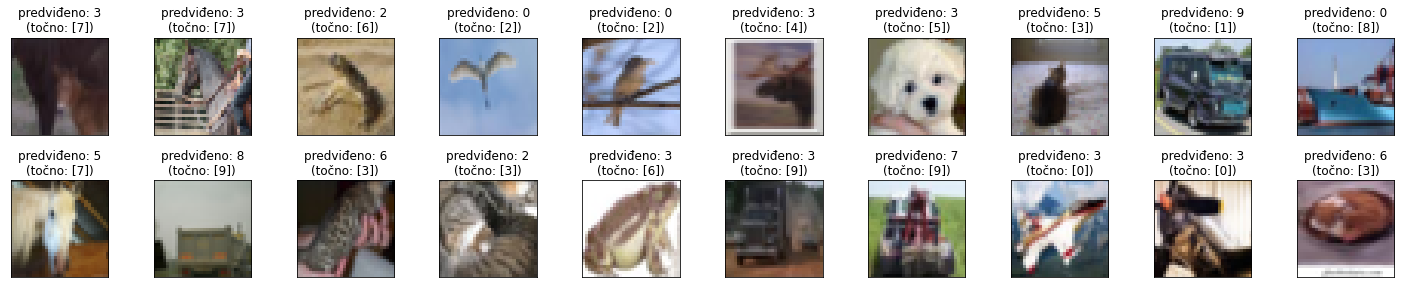

In [ ]:
import random

# uzmimo 20 slučajno odabranih krivo klasificiranih primjerka i prikažimo slike

pogresni = [(i, np.argmax(pred), labela, y_hat[i]) for i, (pred, labela) in enumerate(zip(y_hat, y_test)) if np.argmax(pred) != labela]

fig = plt.figure(figsize = (20,10))
xs = np.arange(10)
cnt = 0

for i, pred, tocno, pred_vjerojatnosti in random.sample(pogresni, 20):
  cnt += 1
  ax1 = fig.add_subplot(5, 10, cnt)
  plt.title("predviđeno: {}\n(točno: {})".format(pred, tocno))
  plt.imshow(x_test[i].reshape(32,32,3))
  plt.xticks([]), plt.yticks([])
  plt.tight_layout()

## Embeddings i obrada prirodnog jezika

[Embeddings](https://en.wikipedia.org/wiki/Word_embedding) su posebni zapisi u obliku liste/vektora koji reprezentiraju riječi. Koriste se u raznim zadacima obrade prirodnog jezika, npr.:
- strojno predvođenje
- nadopunjavanje rečenica
- odgovaranje na pitanja ...

Način na koji se koriste je u procesu pripreme podataka za prosljeđivanje modelu, ili kao ulaz u model. Poanta je riječi (odabranog jezika) reprezentirati vektorima na što smisleniji način. Ovaj proces se može shvatiti kao napredna varijanta kodiranja tekstualnih podataka brojevima.

> Sjetimo se, dosad smo vidjeli kodiranje kategoričkih varijabli (one-hot, count, frequency, ordinalno, ...) i kodiranje teksta (one-hot, tf-idf, ...). Embedding kodiranje ima istu svrhu, samo se radi na "pametniji" način.

[Embeddings](https://machinelearningmastery.com/what-are-word-embeddings/) se stvaraju korištenjem modela dubokog strojnog učenja kako bi se iz velike količine podataka za treniranje vektorima uspjelo modelirati riječi nekog jezika što bolje. Nakon što se kreiraju što bolje reprezentacije riječi, one se zapisuju i dostupne su za daljnje korištenje. Neke od najpoznatijih matrica embeddinga su:
- BERT
- [gloVe](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)
- word2vec ...

Moguće je i sam kreirati vlastite embeddinge, ali i koristiti već gotove (gore nabrojane ili neke druge) za što uspješniji model. Evo [kako](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/).

### Primjer

In [ ]:
import os
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
%cd /content/drive/MyDrive/strojno_ucenje_2223/vj_09/obrada_teksta

/content/drive/MyDrive/strojno_ucenje_2223/vj_09/obrada_teksta


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train shape : ",train_df.shape)
print("Test shape : ",test_df.shape)

Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [ ]:
## split to train and val
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=2018)

## some config values 
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a question to use

## fill up the missing values
train_X = train_df["question_text"].fillna("_na_").values
val_X = val_df["question_text"].fillna("_na_").values
test_X = test_df["question_text"].fillna("_na_").values

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
val_X = pad_sequences(val_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

## Get the target values
train_y = train_df['target'].values
val_y = val_df['target'].values

In [ ]:
train_X

array([[   0,    0,    0, ..., 9003,    6, 5043],
       [   0,    0,    0, ..., 2938, 1211, 1694],
       [   0,    0,    0, ..., 9336,  848,  591],
       ...,
       [   0,    0,    0, ..., 8952,    6, 2571],
       [   0,    0,    0, ...,    4,  408, 2086],
       [   0,    0,    0, ...,   21,  195,   74]], dtype=int32)

In [ ]:
train_y

array([0, 0, 0, ..., 0, 0, 0])

#### Bez prethodno treniranih embeddinga

In [ ]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size)(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          15000000  
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         140544    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0     

In [ ]:
## Train the model 
model.fit(train_X, train_y, batch_size=512, epochs=2, validation_data=(val_X, val_y))

Epoch 1/2
2296/2296 [==============================] - 101s 43ms/step - loss: 0.1224 - accuracy: 0.9534 - val_loss: 0.1077 - val_accuracy: 0.9573
Epoch 2/2
2296/2296 [==============================] - 93s 41ms/step - loss: 0.0979 - accuracy: 0.9608 - val_loss: 0.1055 - val_accuracy: 0.9576


In [ ]:
model.save('/content/drive/MyDrive/strojno_ucenje_2223/vj_09/obrada_teksta/lstm_model_SU_vj09_OPJ.h5')
# model = load_model('/content/drive/MyDrive/strojno_ucenje_2223/vj_09/obrada_teksta/lstm_model_SU_vj09_OPJ.h5')

In [ ]:
pred_noemb_val_y = model.predict([val_X], batch_size=1024, verbose=1)
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_y, (pred_noemb_val_y>thresh).astype(int))))

128/128 [==============================] - 3s 21ms/step
F1 score at threshold 0.1 is 0.5798898071625345
F1 score at threshold 0.11 is 0.5903819776383058
F1 score at threshold 0.12 is 0.597459966869133
F1 score at threshold 0.13 is 0.6045423023578363
F1 score at threshold 0.14 is 0.6108535346845058
F1 score at threshold 0.15 is 0.616796365435653
F1 score at threshold 0.16 is 0.6213707649398746
F1 score at threshold 0.17 is 0.6272701872031293
F1 score at threshold 0.18 is 0.6314297860280573
F1 score at threshold 0.19 is 0.6351960126521614
F1 score at threshold 0.2 is 0.639067055393586
F1 score at threshold 0.21 is 0.6422352304589503
F1 score at threshold 0.22 is 0.6455285364757578
F1 score at threshold 0.23 is 0.6489550123981579
F1 score at threshold 0.24 is 0.6501947918802542
F1 score at threshold 0.25 is 0.6518311028114949
F1 score at threshold 0.26 is 0.6540498034076015
F1 score at threshold 0.27 is 0.6568003394865266
F1 score at threshold 0.28 is 0.6592346446564478
F1 score at thresh

In [ ]:
pred_noemb_test_y = model.predict([test_X], batch_size=1024, verbose=1)

367/367 [==============================] - 8s 21ms/step


In [ ]:
pred_noemb_test_y

array([[8.1505102e-01],
       [1.7036551e-04],
       [3.9226701e-04],
       ...,
       [2.3359582e-03],
       [1.7238111e-04],
       [6.2978588e-02]], dtype=float32)

In [ ]:
# # čišćenje memorije
# del model, inp, x
# import gc; gc.collect()
# time.sleep(10)

#### Sa embeddings

Embeddings datoteke (koje sadrže vrijedne reprezentacije) su obično velike. Iz tog razloga se savjetuje oprez u radu s njima na Colaboratory, jer postoji memorijsko ograničenje Google Diska. Konkretne embeddinge koje koristimo možete pronaći [ovdje](https://www.kaggle.com/datasets/takuok/glove840b300dtxt).

2 su načina za preuzimanje podataka sa Kaggle stranice:
- skinuti podatke na lokalnu mašinu (Vaše računalo) i staviti na svoj Goodle Disk
- [direktno s Kaggle stranice](https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/) na kojoj se nalazi željeni skup podataka

Ovdje koristimo drugi način jer je brži - datoteka je velika (otprilike 5GB).

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
  
od.download("https://www.kaggle.com/datasets/takuok/glove840b300dtxt")

Skipping, found downloaded files in "./glove840b300dtxt" (use force=True to force download)


Skinuta je komprimirana zip datoteka u odvojeni direktorij `glove840b300dtxt`. Još treba otpakirati zip.



In [ ]:
%cd ./glove840b300dtxt

/content/drive/MyDrive/strojno_ucenje_2223/vj_09/obrada_teksta/glove840b300dtxt


In [ ]:
!unzip glove840b300dtxt.zip -d glove_embeddings

unzip:  cannot find or open glove840b300dtxt.zip, glove840b300dtxt.zip.zip or glove840b300dtxt.zip.ZIP.


In [ ]:
EMBEDDING_FILE = 'glove.840B.300d.txt' # relativna putanja do datoteke + ime datoteke

def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 300)          15000000  
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         140544    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0     

In [ ]:
model.fit(train_X, train_y, batch_size=512, epochs=2, validation_data=(val_X, val_y))

Epoch 1/2
2296/2296 [==============================] - 103s 41ms/step - loss: 0.1146 - accuracy: 0.9555 - val_loss: 0.1006 - val_accuracy: 0.9596
Epoch 2/2
2296/2296 [==============================] - 95s 41ms/step - loss: 0.0941 - accuracy: 0.9625 - val_loss: 0.1003 - val_accuracy: 0.9601


In [ ]:
pred_glove_val_y = model.predict([val_X], batch_size=1024, verbose=1)
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_y, (pred_glove_val_y>thresh).astype(int))))

128/128 [==============================] - 3s 22ms/step
F1 score at threshold 0.1 is 0.6181786583246438
F1 score at threshold 0.11 is 0.6259528452402056
F1 score at threshold 0.12 is 0.6314222563038477
F1 score at threshold 0.13 is 0.6379389382965068
F1 score at threshold 0.14 is 0.6438847246147399
F1 score at threshold 0.15 is 0.648615442774785
F1 score at threshold 0.16 is 0.6525691321404651
F1 score at threshold 0.17 is 0.6559426328794999
F1 score at threshold 0.18 is 0.6592469111590508
F1 score at threshold 0.19 is 0.6617443012884043
F1 score at threshold 0.2 is 0.6645290581162325
F1 score at threshold 0.21 is 0.6669708491761724
F1 score at threshold 0.22 is 0.6683066830668306
F1 score at threshold 0.23 is 0.6701538142834947
F1 score at threshold 0.24 is 0.6720008367325594
F1 score at threshold 0.25 is 0.6728932510157776
F1 score at threshold 0.26 is 0.6744099312696468
F1 score at threshold 0.27 is 0.6740485917007095
F1 score at threshold 0.28 is 0.6746203904555315
F1 score at thre

In [ ]:
pred_glove_test_y = model.predict([test_X], batch_size=1024, verbose=1)

367/367 [==============================] - 8s 21ms/step


In [ ]:
# čišćenje memorije
del word_index, embeddings_index, all_embs, embedding_matrix, model, inp, x
import gc; gc.collect()
time.sleep(10)

## Predviđanje i vremenski nizovi

Predviđanje vremenskih nizova (eng. [time series](https://en.wikipedia.org/wiki/Time_series) [forecasting](https://machinelearningmastery.com/time-series-forecasting/)) jedan je od zadataka strojnog učenja kojem se treba posvetiti posebna pažnja kako se ne bi radile [neke od najčešćih grešaka](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424). Zadaci koji uključuju vremenske nizove sliče najviše regresiji, međutim, zbog posebne prirode podataka koje promatramo u vremenskoj domeni, nije jednak pristup. Vremenski nizovi imaju svojstva koja ih izdvajaju:
- uređaj (poredani su po redu, treba paziti kod slučajnih odabira)
- trendovi i sezonalnost ("oblici krivulje" koji su repetitivni, periodički)
- moguća cikličnost (periodičnost) ...

Iz tog razloga, postoje [utemeljene standardne metode](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/) kojima se radi s vremenskim nizovima, osim strojnog učenja. Od metoda strojnog učenja, [neuronske mreže](https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/) su jedan od moćnijih i najčešće korištenih alata za predviđanje vremenskih nizova.

Primjene analize i predviđanja vremenskih nizova su raznolike, a može se raditi o iznimno teškom zadatku za rješavanje, s obzirom na to da na vrijednost neke vremenske varijable može utjecati stotine faktora. Jedan od takvih primjera je [predviđanje u financijskom sektoru i vremenske prognoze](https://www.kaggle.com/code/thebrownviking20/everything-you-can-do-with-a-time-series).

### Primjer

Zadatak je: predvidjeti prodaju proizvoda u trgovinama idućih mjesec dana.
> "predict total sales for every product and store in the next month"

In [ ]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

# warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
%cd /content/drive/MyDrive/strojno_ucenje_2223/vj_09

/content/drive/MyDrive/strojno_ucenje_2223/vj_09


In [ ]:
test = pd.read_csv('test.csv', dtype={'ID': 'int32', 'shop_id': 'int32', 
                                                  'item_id': 'int32'})
item_categories = pd.read_csv('item_categories.csv', 
                              dtype={'item_category_name': 'str', 'item_category_id': 'int32'})
items = pd.read_csv('items.csv', dtype={'item_name': 'str', 'item_id': 'int32', 
                                                 'item_category_id': 'int32'})
shops = pd.read_csv('shops.csv', dtype={'shop_name': 'str', 'shop_id': 'int32'})
sales = pd.read_csv('sales_train.csv', parse_dates=['date'], 
                    dtype={'date': 'str', 'date_block_num': 'int32', 'shop_id': 'int32', 
                      'item_id': 'int32', 'item_price': 'float32', 'item_cnt_day': 'int32'})

In [ ]:
train = sales.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)

In [ ]:
print(f"Min date from train set: {train['date'].min().date()}")
print(f"Max date from train set: {train['date'].max().date()}")
train.head()

Min date from train set: 2013-01-01
Max date from train set: 2015-12-10


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [ ]:
train_monthly = train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day']]
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)
train_monthly = train_monthly.agg({'item_cnt_day':['sum']})
train_monthly.columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt']
train_monthly = train_monthly.query('item_cnt >= 0 and item_cnt <= 20')
# Label
train_monthly['item_cnt_month'] = train_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['item_cnt'].shift(-1)

display(train_monthly.head(10).T)
# display(train_monthly.describe().T)

,0,1,2,3,4,5,6,7,8,9
date_block_num,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
shop_id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
item_id,32.00,33.00,35.00,43.00,51.00,61.00,75.00,88.00,95.00,96.00
item_cnt,6.00,3.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
item_cnt_month,10.00,3.00,14.00,NaN,3.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
monthly_series = train_monthly.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num',values='item_cnt', fill_value=0).reset_index()
monthly_series.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,36,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
first_month = 20
last_month = 33
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['shop_id'], row['item_id']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['shop_id', 'item_id']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_series = data_series.drop(['item_id', 'shop_id'], axis=1)

In [ ]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [ ]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set reshaped (762717, 12, 1)
Validation set reshaped (84747, 12, 1)


In [ ]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1

epochs = 20
batch = 128
lr = 0.0001

lstm_model = Sequential()
lstm_model.add(L.LSTM(10, input_shape=(serie_size, n_features), return_sequences=True))
lstm_model.add(L.LSTM(6, activation='relu', return_sequences=True))
lstm_model.add(L.LSTM(1, activation='relu'))
lstm_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
lstm_model.add(L.Dense(1))
lstm_model.summary()

adam = optimizers.Adam(lr)
lstm_model.compile(loss='mse', optimizer=adam)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 10)            480       
                                                                 
 lstm_1 (LSTM)               (None, 12, 6)             408       
                                                                 
 lstm_2 (LSTM)               (None, 1)                 32        
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainabl

In [ ]:
lstm_history = lstm_model.fit(X_train, Y_train, 
                              validation_data=(X_valid, Y_valid), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2)

Epoch 1/20
5959/5959 - 263s - loss: 0.4582 - val_loss: 0.4385 - 263s/epoch - 44ms/step
Epoch 2/20
5959/5959 - 258s - loss: 0.4226 - val_loss: 0.4159 - 258s/epoch - 43ms/step
Epoch 3/20
5959/5959 - 255s - loss: 0.4010 - val_loss: 0.3942 - 255s/epoch - 43ms/step
Epoch 4/20
5959/5959 - 252s - loss: 0.3885 - val_loss: 0.3876 - 252s/epoch - 42ms/step
Epoch 5/20
5959/5959 - 246s - loss: 0.3835 - val_loss: 0.3850 - 246s/epoch - 41ms/step
Epoch 6/20
5959/5959 - 264s - loss: 0.3809 - val_loss: 0.3826 - 264s/epoch - 44ms/step
Epoch 7/20
5959/5959 - 244s - loss: 0.3793 - val_loss: 0.3820 - 244s/epoch - 41ms/step
Epoch 8/20
5959/5959 - 242s - loss: 0.3780 - val_loss: 0.3802 - 242s/epoch - 41ms/step
Epoch 9/20
5959/5959 - 292s - loss: 0.3772 - val_loss: 0.3813 - 292s/epoch - 49ms/step
Epoch 10/20
5959/5959 - 300s - loss: 0.3767 - val_loss: 0.3787 - 300s/epoch - 50ms/step
Epoch 11/20
5959/5959 - 265s - loss: 0.3760 - val_loss: 0.3787 - 265s/epoch - 44ms/step
Epoch 12/20
5959/5959 - 291s - loss: 0.37

Uputno je spremiti model kad se radi o dugom treniranju, kako ga se ne bi trebalo trenirati ponovno. Za ponovno korištenje istreniranog modela može se jednostavno učitati. U ovom slučaju, model se trenirao otprilike 1 sat i 30 minuta. Da bi se smanjilo vrijeme treniranja, moglo se uzeti manje epoha (prolazaka kroz skup za treniranje), ili jednostavniji model.

In [ ]:
lstm_model.save('/content/drive/MyDrive/strojno_ucenje_2223/vj_09/lstm_model_timeseries/lstm_model_SU_vj09_timeseries.h5')
# model = load_model('/content/drive/MyDrive/strojno_ucenje_2223/vj_09/lstm_model_timeseries/lstm_model_SU_vj09_timeseries.h5')

Text(0, 0.5, 'MSE')

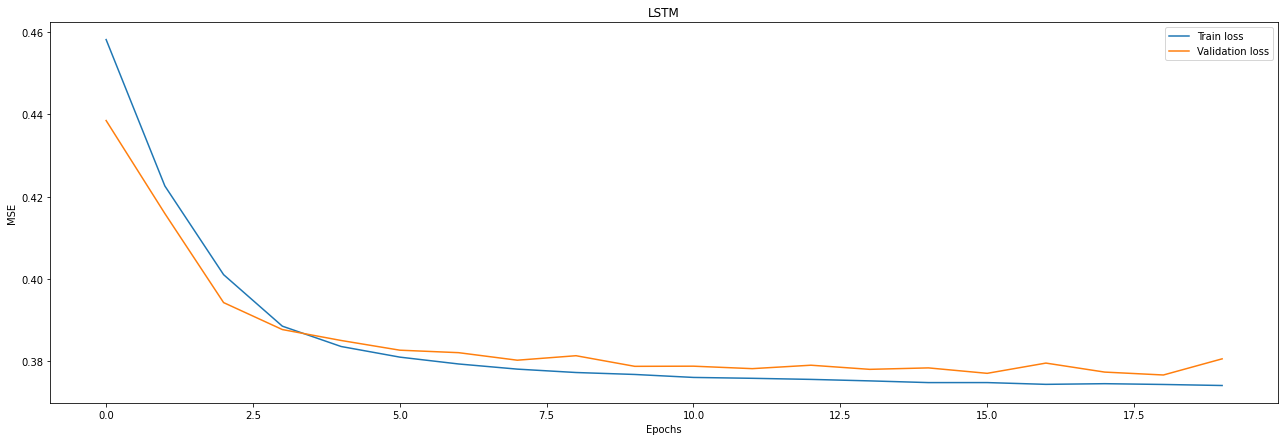

In [ ]:
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(22,7))

ax1.plot(lstm_history.history['loss'], label='Train loss')
ax1.plot(lstm_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('LSTM')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

In [ ]:
lstm_train_pred = lstm_model.predict(X_train)
lstm_val_pred = lstm_model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

2649/2649 [==============================] - 14s 5ms/step
Train rmse: 0.6152570955748475
Validation rmse: 0.6168640983271574


In [ ]:
latest_records = monthly_series.drop_duplicates(subset=['shop_id', 'item_id'])
X_test = pd.merge(test, latest_records, on=['shop_id', 'item_id'], how='left', suffixes=['', '_'])
X_test.fillna(0, inplace=True)
X_test.drop(['ID', 'item_id', 'shop_id'], axis=1, inplace=True)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,0.00,0.00,0.00,1.00,1.00,1.00,3.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,3.00,2.00,0.00,1.00,3.00,1.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X_test = X_test[[(i + (34 - serie_size)) for i in range(serie_size)]]
X_test.head()

,22,23,24,25,26,27,28,29,30,31,32,33
0,1.00,2.00,2.00,0.00,0.00,0.00,1.00,1.00,1.00,3.00,1.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,3.00,2.00,0.00,1.00,3.00,1.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test_reshaped.shape)

(214200, 12, 1)


In [ ]:
lstm_test_pred = lstm_model.predict(X_test_reshaped)

6694/6694 [==============================] - 46s 7ms/step


In [ ]:
lstm_prediction = pd.DataFrame(test['ID'], columns=['ID'])
lstm_prediction['item_cnt_month'] = lstm_test_pred.clip(0., 20.)
# lstm_prediction.to_csv('/content/drive/MyDrive/strojno_ucenje_2223/vj_09/lstm_model_timeseries/lstm_submission.csv', index=False)
lstm_prediction.head(10)

,ID,item_cnt_month
0,0,0.47
1,1,0.09
2,2,1.07
3,3,0.16
4,4,0.09
5,5,0.57
6,6,1.22
7,7,0.19
8,8,1.53
9,9,0.09
